### Esercitazione 2 - Recupero serie storiche di Crypto-valute
#### Argomenti

* recupero lista crypto-valute supportate
* serie storiche da un provider dati (CoinBase Pro)
* produzione di grafici delle candele scaricate in differenti stili

In [1]:
from Historic_Crypto import HistoricalData, Cryptocurrencies  # pip install Historic-Crypto
from datetime import datetime, timedelta
import mplfinance as mpf

In [2]:
# lista delle cryptovalute supportate

crypto_list = Cryptocurrencies().find_crypto_pairs()

print(crypto_list.head())

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.
         id display_name  fx_stablecoin max_slippage_percentage  status
0   REQ-BTC      REQ/BTC          False              0.03000000  online
1  NEST-USD     NEST/USD          False              0.03000000  online
2   OXT-USD      OXT/USD          False              0.03000000  online
3   CLV-GBP      CLV/GBP          False              0.03000000  online
4  LINK-EUR     LINK/EUR          False              0.03000000  online


In [3]:
print(len(crypto_list), 'crypto supportate: \n')

for id, c in crypto_list.iterrows():
    crypto_name = c.id

    # aggiunta di spazi ai nomi per
    # migliore formattazione a video
    while len(crypto_name) < 7:
        crypto_name += ' '

    print(crypto_name, '\t', end='')

    if id % 6 == 0:
        print()

561 crypto supportate: 

REQ-BTC 	
NEST-USD 	OXT-USD 	CLV-GBP 	LINK-EUR 	SUPER-USD 	DOGE-USD 	
NMR-EUR 	LINK-GBP 	KSM-USDT 	APE-EUR 	ADA-USDC 	BCH-BTC 	
BAND-BTC 	UNI-BTC 	KNC-BTC 	GNO-USD 	SOL-GBP 	FIL-GBP 	
BTRST-GBP 	AGLD-USDT 	CGLD-GBP 	MXC-USD 	METIS-USDT 	BTRST-USD 	
VGX-USDT 	VGX-USD 	AUCTION-USD 	UMA-EUR 	NCT-USDT 	TIME-USD 	
COVAL-USD 	MATH-USDT 	00-USD  	WAMPL-USD 	YFII-USD 	NCT-EUR 	
GTC-USD 	REN-BTC 	ADA-GBP 	LCX-EUR 	AXS-BTC 	ICP-EUR 	
GLM-USD 	NMR-USD 	BCH-GBP 	GALA-USDT 	LINK-ETH 	ICP-USD 	
STX-USD 	PRO-USD 	NEST-USDT 	ALGO-GBP 	SKL-USD 	WLUNA-USDT 	
ARPA-USDT 	XYO-USDT 	POWR-USDT 	XYO-BTC 	BICO-USD 	ASM-USD 	
LOOM-USD 	LINK-USD 	WAMPL-USDT 	ETH-USD 	FIL-BTC 	ELA-USDT 	
STG-USDT 	DAI-USDC 	DDX-EUR 	NCT-USD 	POWR-USD 	KSM-USD 	
SHIB-USDT 	WCFG-USDT 	GRT-BTC 	BLZ-USD 	CHZ-USDT 	SUSHI-ETH 	
RAI-USD 	DNT-USD 	CRO-USD 	USDT-USDC 	HBAR-USD 	TRAC-USDT 	
RNDR-USD 	UMA-BTC 	ETH-DAI 	IOTX-USD 	CRV-USD 	LTC-EUR 	
LPT-USD 	CGLD-USD 	SUSHI-GBP 	XTZ-GBP 	MTL-USD 	ETC-GBP 	
ZEC-BTC 	RB

In [4]:
# recupero serie storica dei livelli di prezzo del BitCoin
# degli ultimi 90 giorni in H1

end_date = datetime.now()
start_date = end_date - timedelta(days=90)
candles = HistoricalData(
    ticker='BTC-USD',
    granularity=3600,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

Provisional Start: 2022-07-14T17:23:00
Provisional End: 2022-07-27T05:23:00
Provisional Start: 2022-07-27T05:23:00
Provisional End: 2022-08-08T17:23:00
Provisional Start: 2022-08-08T17:23:00
Provisional End: 2022-08-21T05:23:00
Provisional Start: 2022-08-21T05:23:00
Provisional End: 2022-09-02T17:23:00
Provisional Start: 2022-09-02T17:23:00
Provisional End: 2022-09-15T05:23:00
Provisional Start: 2022-09-15T05:23:00
Provisional End: 2022-09-27T17:23:00
Provisional Start: 2022-09-27T17:23:00
Provisional End: 2022-10-10T05:23:00
Provisional Start: 2022-10-10T05:23:00
Provisional End: 2022-10-22T17:23:00


In [5]:
candles.head()

,low,high,open,close,volume
time,,,,,
2022-07-14 18:00:00,20614.78,20768.08,20723.03,20689.50,1481.334500
2022-07-14 19:00:00,20564.12,20893.73,20689.57,20590.08,2263.678018
2022-07-14 20:00:00,20504.51,20689.34,20589.29,20666.33,744.630579
2022-07-14 21:00:00,20386.75,20708.47,20666.33,20461.52,513.571234
2022-07-14 22:00:00,20431.93,20548.74,20459.84,20489.13,482.016399


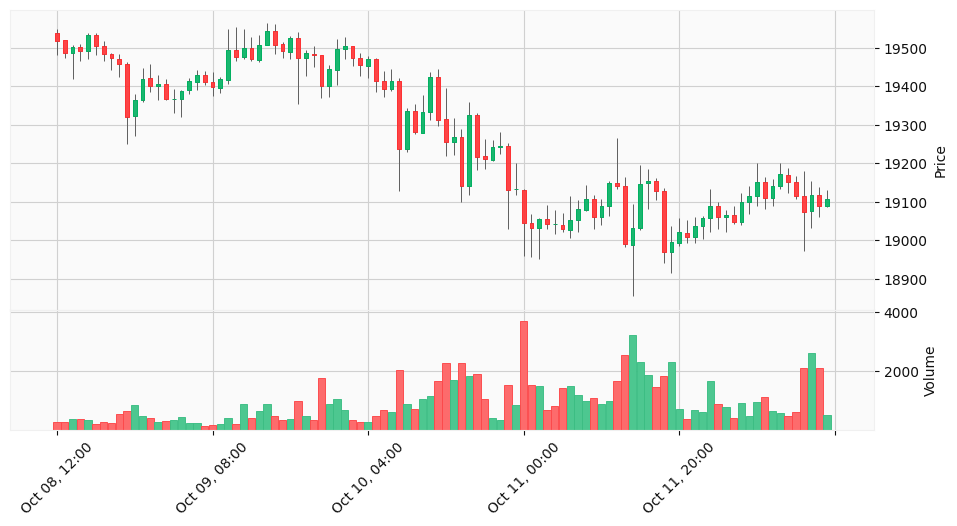

In [6]:
mpf.plot(candles[-100:], style='yahoo', type='candle', volume=True, figsize=(12, 6))

In [7]:
# impostazione della corretta localizzazione
# per visualizzare le date in formato italiano
# (in base alle impostazioni del PC su cui
# è fatto girare lo script)

import locale

locale.setlocale(locale.LC_ALL, '')

'Italian_Italy.1252'

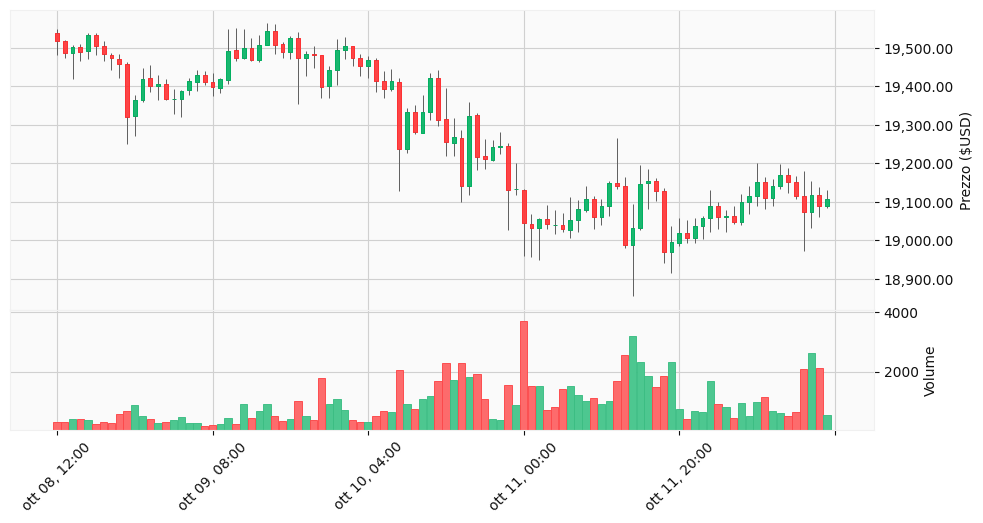

In [8]:
# impostazione del formato italiano per la
# rappresentazione dei livelli di prezzo
# in un grafico a candele

from matplotlib.ticker import StrMethodFormatter

fig, ax = mpf.plot(
    candles[-100:],
    style='yahoo',
    type='candle',
    volume=True,
    figsize=(12, 6),
    returnfig=True,
    ylabel='Prezzo ($USD)'
)

ax[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))

mpf.show()

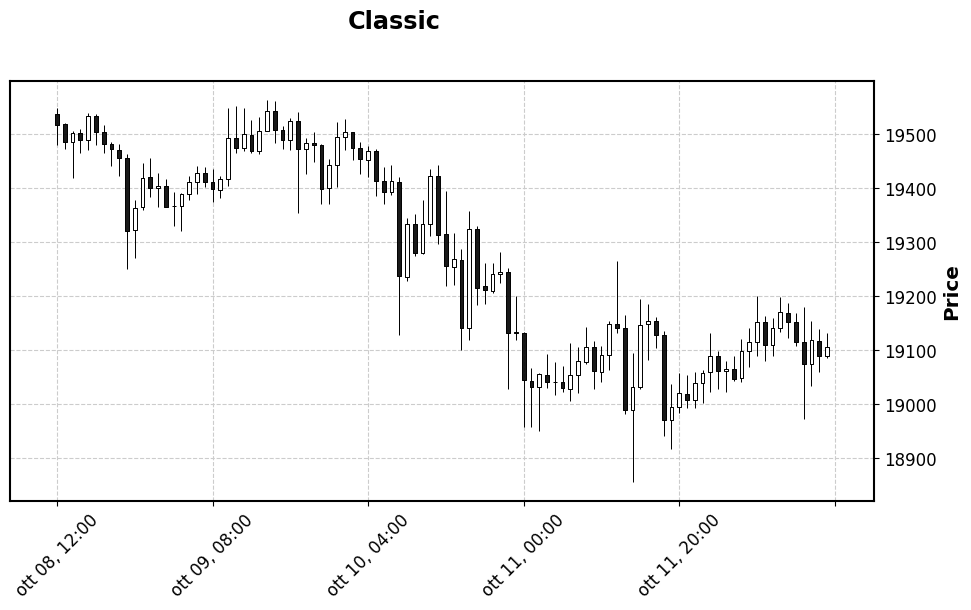

In [9]:
# altri stili disponibili

mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='classic', title='Classic')

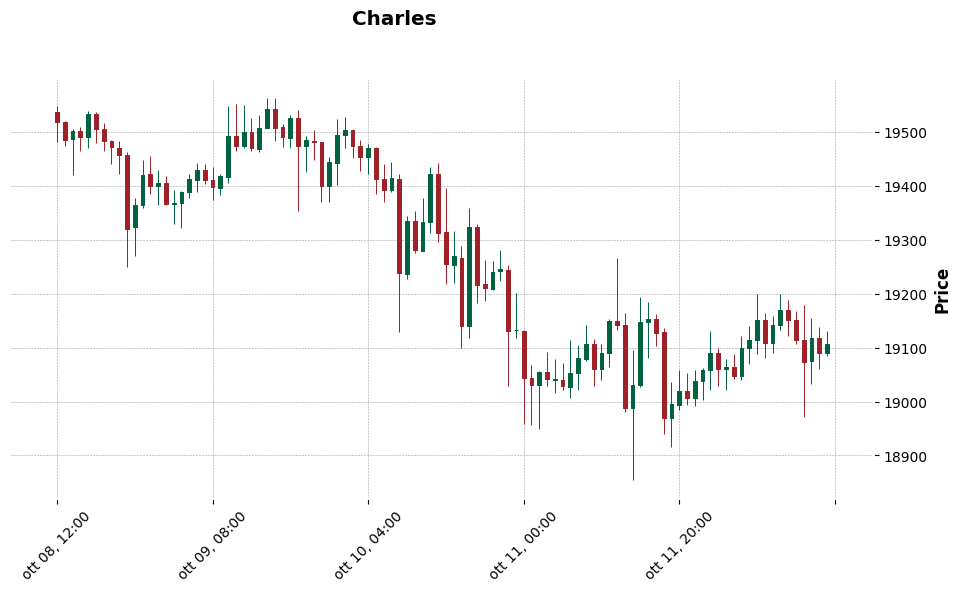

In [10]:
mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='charles', title='Charles')

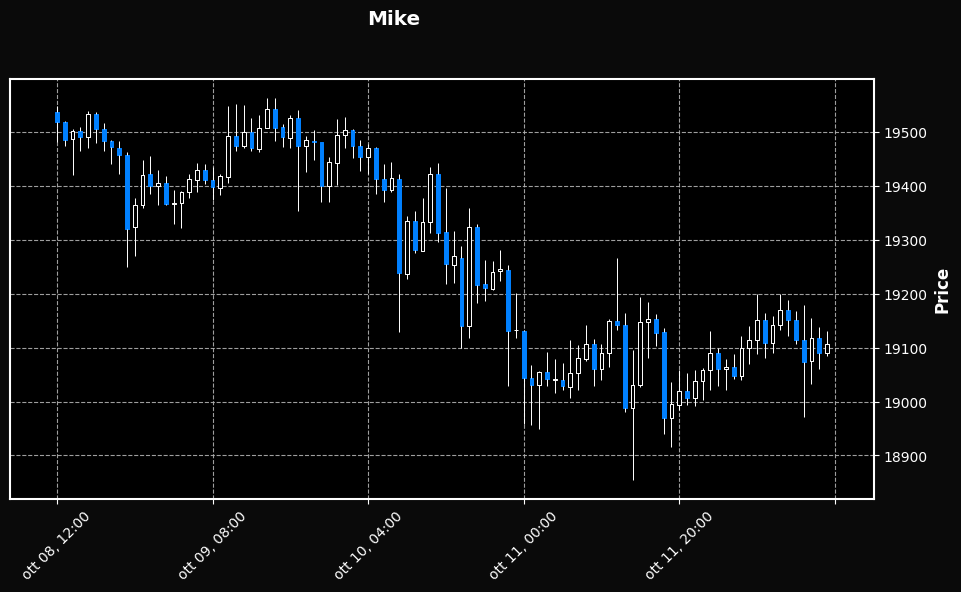

In [11]:
mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='mike', title='Mike')

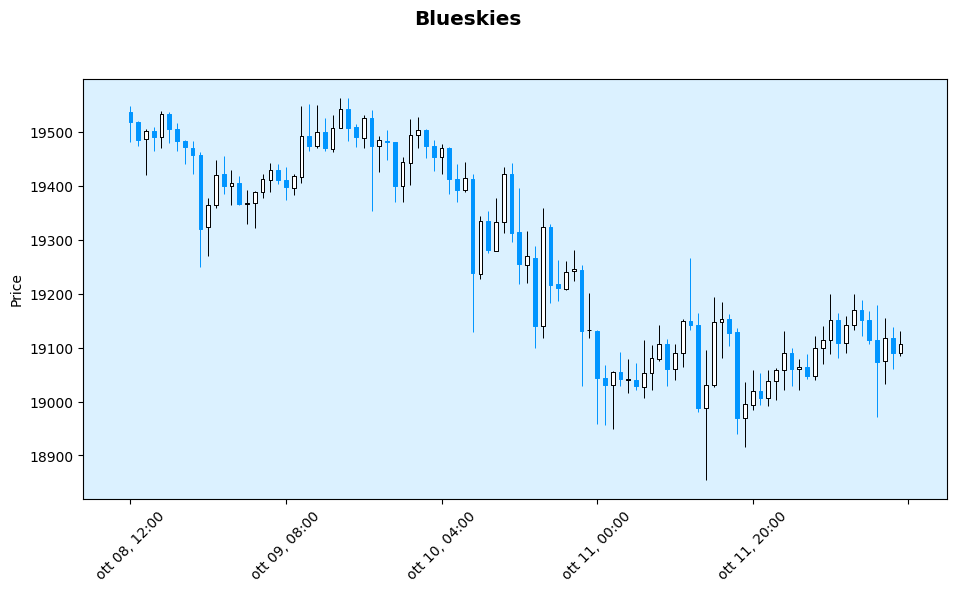

In [12]:
mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='blueskies', title='Blueskies')

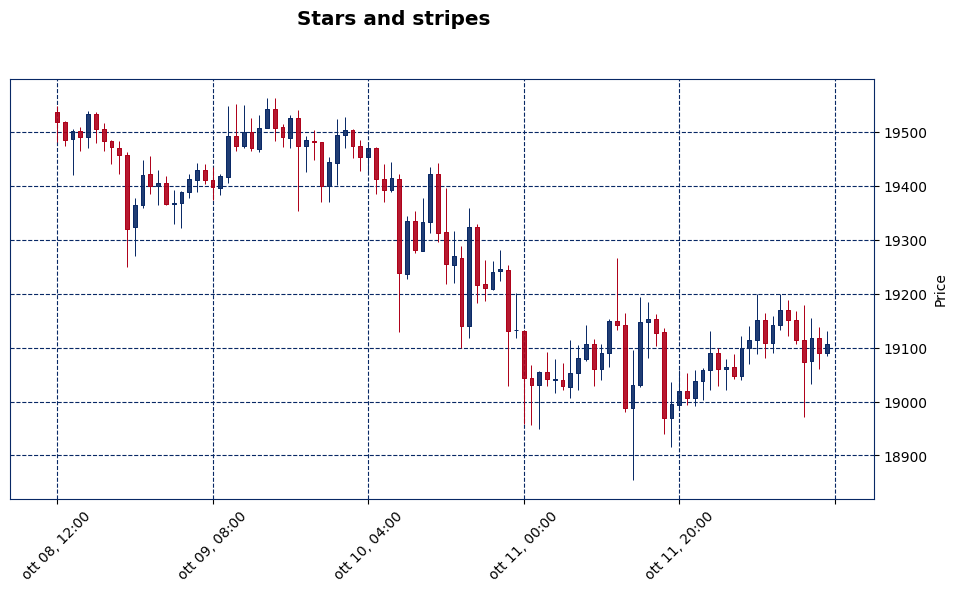

In [13]:
mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='starsandstripes', title='Stars and stripes')

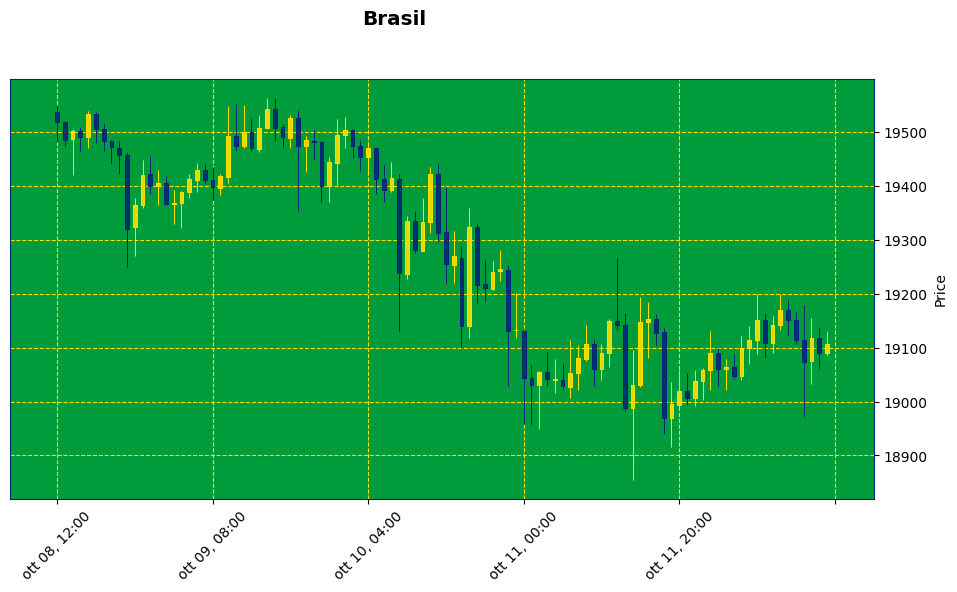

In [14]:
mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='brasil', title='Brasil')

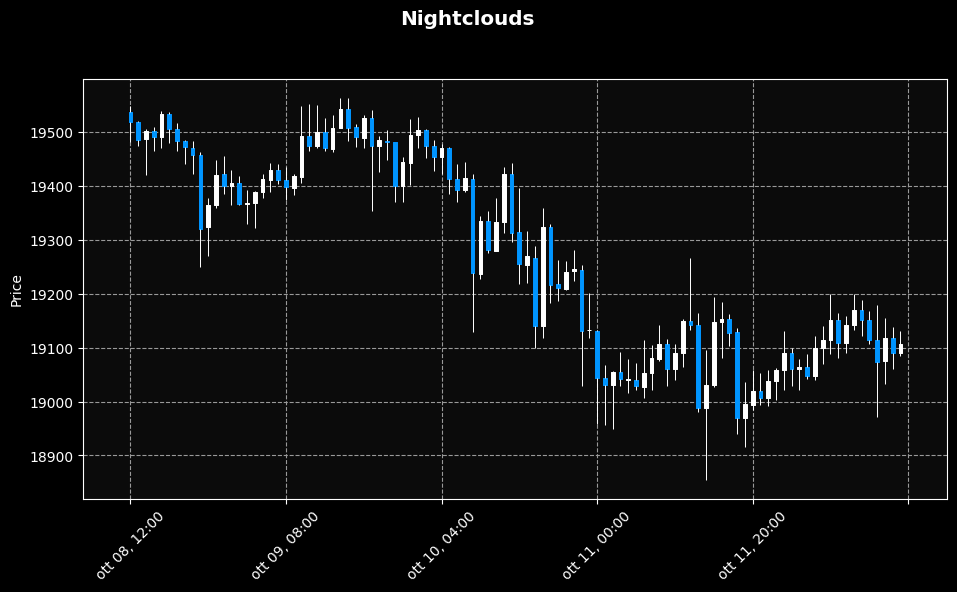

In [15]:
mpf.plot(candles[-100:], figsize=(12, 6), type='candle', style='nightclouds', title='Nightclouds')

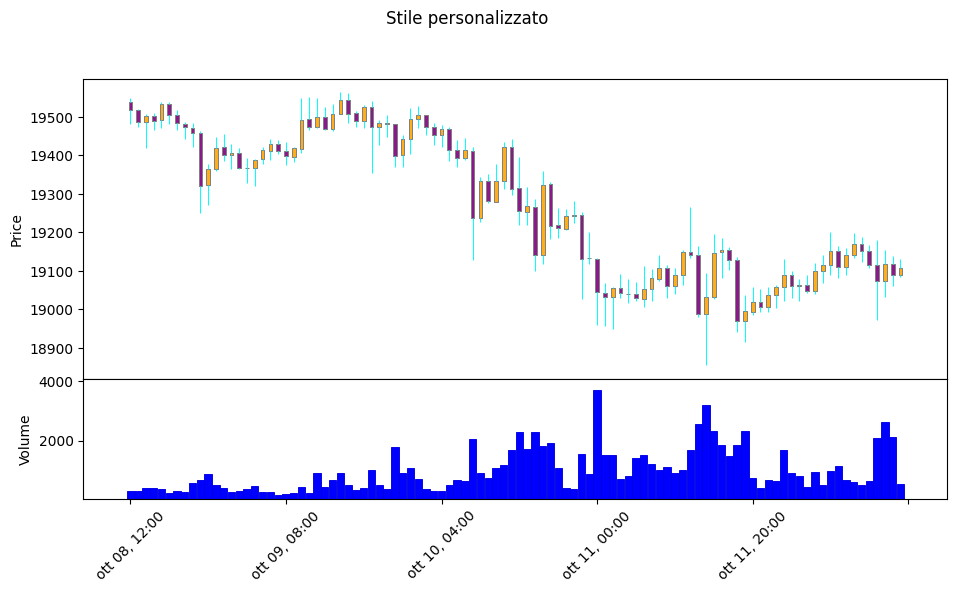

In [16]:
# creazione di uno stile custom

market_colors = mpf.make_marketcolors(
    up='orange',
    down='purple',
    edge='gray',
    volume='blue',
    wick='cyan'
)
custom_style = mpf.make_mpf_style(marketcolors=market_colors)

mpf.plot(
    candles[-100:],
    figsize=(12, 6),
    type='candle',
    style=custom_style,
    title='Stile personalizzato',
    volume=True
)

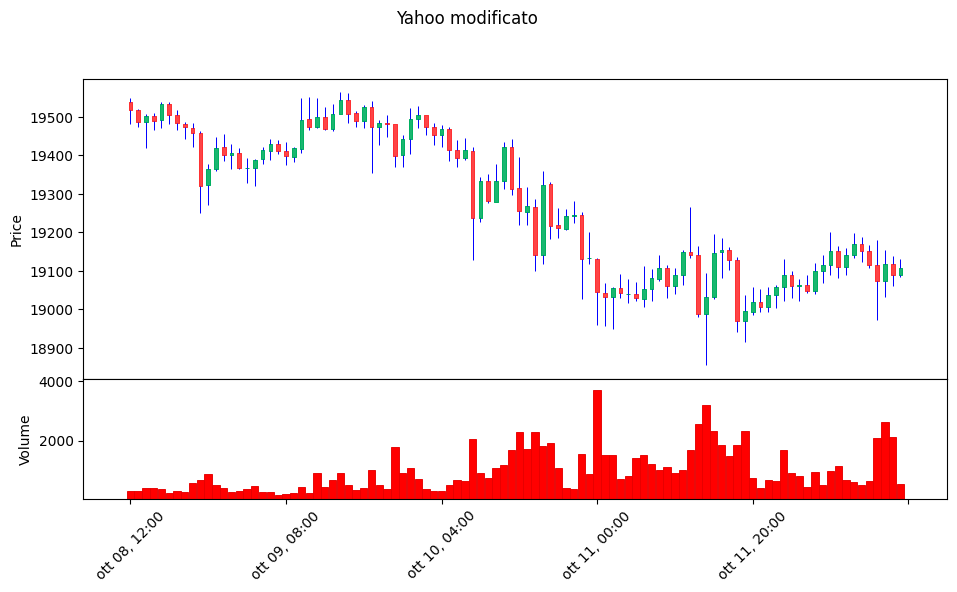

In [17]:
# creazione di uno stile custom
# partendo da uno stile standard

market_colors = mpf.make_marketcolors(
    base_mpf_style='yahoo',
    volume='red',
    wick='blue'
)
custom_style  = mpf.make_mpf_style(marketcolors=market_colors)

mpf.plot(
    candles[-100:],
    figsize=(12, 6),
    type='candle',
    style=custom_style,
    title='Yahoo modificato',
    volume=True
)